G = [ g(x1-t1) g(x1-t2) ... g(x1-tN)
      g(x2-t1) g(x2-t2) ... g(x2-tN)
      ...
      g(xM-t1) g(xM-t2) ... g(xM-tN)]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel_1d(x, xi, sigma):
    return np.exp(-((x - xi) ** 2) / (2 * sigma ** 2))

def construct_G_matrix(xi_values, t_values, sigma):
    M = len(xi_values)
    N = len(t_values)
    G = np.zeros((M, N)) 

    for i, xi in enumerate(xi_values):
        for j, tj in enumerate(t_values):
            G[i, j] = gaussian_kernel_1d(xi, tj, sigma)  # g(xi - tj)
    
    return G

# Set parameters G: M * N matrix
M = 100  # ξ_m
N = 100  # t_n
sigma = 4

# Generate xi and t values
xi_values = np.linspace(0, 100, M)  # range of ξ_m
t_values = np.linspace(0, 100, N)  # range of t_n

# Construct G, F, X matrix
G = construct_G_matrix(xi_values, t_values, sigma)
F = G.T
X = np.random.random((N, N)) 

# Y1 = G．X．F.T
Y = np.dot(np.dot(G, X), F.T)
vec_Y = Y.flatten()

print(f"size of G:{G.shape}")
print(f"size of X:{X.shape}")
print(f"size of Y:{Y.shape}")
print(f"size of vec_Y:{vec_Y.shape}")
print(f"vec_Y1:{vec_Y}")

# Y2 = F kron G．vec(X)
vec_X = X.flatten()
Y2 = np.dot(np.kron(F, G), vec_X)
print(f"vec_Y2:{Y2}")

size of G:(100, 100)
size of X:(100, 100)
size of Y:(100, 100)
size of vec_Y:(10000,)
vec_Y1:[15.94877761 18.54670938 20.8318293  ... 19.58598667 17.46067291
 14.9956044 ]
vec_Y2:[15.94877761 18.54670938 20.8318293  ... 19.58598667 17.46067291
 14.9956044 ]


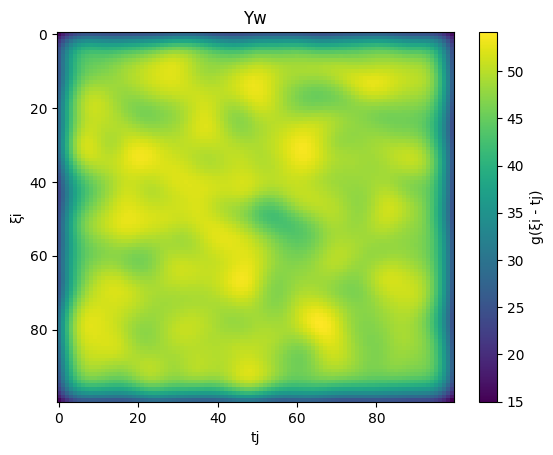

In [10]:
Y2 = Y2.reshape(N,N)
plt.imshow(Y2, cmap='viridis', aspect='auto')
plt.colorbar(label="g(ξi - tj)")
plt.title("Yw")
plt.xlabel("tj")
plt.ylabel("ξi")
plt.show()
